In [3]:
import os
from sys import path
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.randomize_f as myrand
import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import subprocess as sbp
import myfuncions.graphs_f as gf
name = 'probe.xyz'

In [3]:
coords = cs.cubeShell(14,2.775,'fcc')
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos, eleList = tools.spherical_cut(atpos, eleList, 25)
atpos = myrand.remove_at_powrad(atpos,0.05,25)
atpos, eleList, mode = myrand.cambiar_elementos_prob(atpos,{'Pt':0.38, 'Pd':0.62})
atpos, eleList, mode = myrand.pol_ab_rad_ch(atpos, eleList, {'Pt':0.28, 'Pd':0.45, 'Co':0.27}, 50.0, 'Co', 0.75, 0.04)
#atpos, eleList = tools.leer_xyz('M0-polrad_1.xyz')
tools.show_percent(atpos, eleList)

try: os.remove(name)
except: pass

tools.wXYZ(atpos, name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

gf.plot_dump_f_y_atpr(atpos,'Co',1.4)

Corta esfericamente al atpos
Elimina aleatoriament el 0.05% de atpos para p(r)=a*x^(1/percent% -1)
fracción quitada es 0.05, p es 19.0
Cambia elementos prob a atpos
Cambia en potencia el porcentaje radial de átomos en {'Pt': 0.28, 'Pd': 0.45, 'Co': 0.27}
per es 0.27, p es 2.260869565217391
0.072649922336173 0.19648463743169728 0.4313731937376613 0.79


FileNotFoundError: [Errno 2] No such file or directory: 'M0-polrad_1.xyz'

In [3]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

probe.ini


In [4]:
import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
time.sleep(160)

In [5]:
datpos, deleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name[:-4]}_d2.xyz')
#sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d2.xyz'])

Cambia etiquetas a "atpos"
jala
atomos totales : 4321
Pt : 27.655635269613516 %, 1195
Pd : 45.52186993751447 %, 1967
Co : 26.82249479287202 %, 1159


In [6]:
import PDF.runner as pdf
pdf.run_pdf(f'{name[:-4]}_d2.xyz', dir_actual, 2600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\26_de_abril\FittingM5_vartemp

  -6.98999986E-02  -7.94954014      -22.9249001              27   214985.000    
  -3.88908005      -4.11416006      -22.9724998              27   214985.000    
   7.81800002E-02  -3.95480990      -23.0566006              27   214985.000    
        4321  atomos      9333360  pares 
 Rango de distancias    2.12302184     -   49.0554352    
 Distancias promedio    25.1951656    
 Factor de normalizacion    454626.375    



In [7]:
#from V2.pdf import getStr, histogram, calcPDF

#atpos, size = getStr('probe_d2.xyz')
#dx = 0.01
#hist, dmean = histogram(atpos,size)
#calcPDF(hist,name)
#os.system('mv pdf.dat '+ name[:-4] +'-pdf.dat')


In [8]:
####### Tomado del código de python para hacer el pdf ¿para que sirve cada cosa?
#    a = 2.72
#	b = 2.198
#	b = 0.35
#	lh = len(h)
#	hs = smooth(h,10)
#	hs2 = smooth(hs1,5)
#	hs = smooth(hs2,5)
#	bs1 = smooth(h,100)
#	bs2 = smooth(bs1,100)
#	gr = np.array(hs) -np.array(bs2)
#	k = int(a /dx) -1
#	y = h[k] -bs2[k]
#	c = b /y
#	c = b /gr[k] 
#	gr *= c

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np


M0= pd.read_csv(f'{name[:-4]}_d2.txt', sep='\s+')
M = pd.DataFrame()

df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index += 1
M['exp'] = rest_df_exp

dx = 0.02

M['M0'] = M0['G(r)']
M.index = (M.index + 1)*dx

a = M[M['M0']== max(M['M0'])].index[0]
b = 0.29 #### Al parecer este es el originario de todo lo que yo estaba haciendo
c = b/(float(M['M0'][a]))
M['M0'] *= c
print(c)
rest = M['exp'] - M['M0']
error = np.sum(rest**2)
error_p = np.sqrt(error)*100/50
print(f'Para M0 el error es {error},y el error porcentual es {error_p}')

fig = px.line(M, template='simple_white', title='Pair Distribution Functions of 9 Models',
    width=1000, height=600)
fig.update_layout(
    font_family="serif",
    title_font_family="serif")
fig.update_xaxes(title_text='G(r)')
fig.update_yaxes(title_text='r [A]')
fig.show()


2.2478877606387098
Para M0 el error es 0.6979496607246176,y el error porcentual es 1.6708676317705333


### Si al parecer el factor de escala terminó ajustando mis resultados

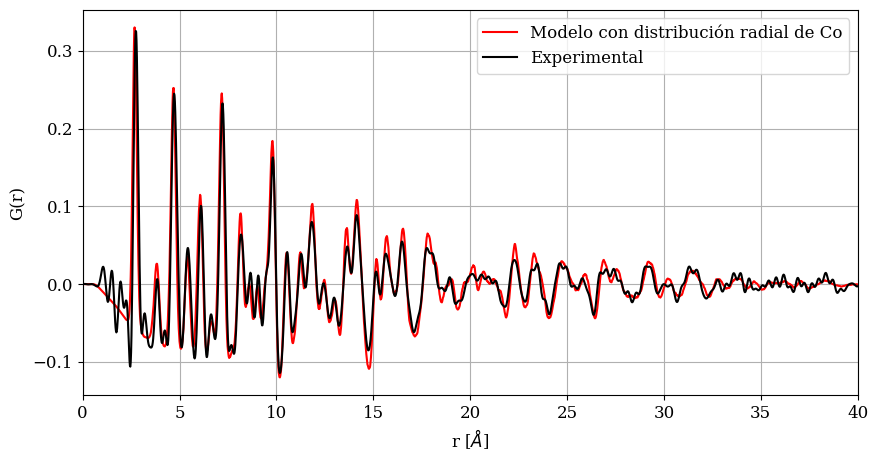

In [6]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(10,5))
ax.plot(M.index, M['M0'], label='Modelo con distribución radial de Co', color = 'red')
ax.plot(M.index,M['exp'], label = 'Experimental', color = 'black')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

### Análisis
Tan solo al escalar el rdf de fortran he reducido el error a la mitad

Tiene la temperatura en 450 K, esperando un corrimiento a la derecha.

Es un modelo tipo M1 intentar con un M4 o M3.5
